In [1]:
"""Focusing on Anger & Surprise"""
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models

In [2]:
model_args = ClassificationArgs( # args
    num_train_epochs=3, # cycle through data 6 times
    overwrite_output_dir=True, # o-write direct
    learning_rate=2e-5, # adjust rate
    train_batch_size=8, #training batches
    eval_batch_size=8,
    evaluate_during_training=True, # eval during train
)

In [3]:
#considered as the optim.
model_distilbert = ClassificationModel('distilbert', 'distilbert-base-uncased', args=model_args , num_labels = 2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
model_roberta = ClassificationModel('roberta', 'roberta-base', args=model_args, num_labels = 2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Dataset (1)

https://colab.research.google.com/drive/19kBHJfud62yDHubqunrpbUxn_Qg8nJKZ?usp=sharing#scrollTo=ctfhqcQzJEXM

In [5]:
emo_train_df = pd.read_csv('C:\\Users\\NashW\PycharmProjects\\NeuralNetwork\\text_Mining_NLP_FGCU\\Datasets\\github-train.csv', sep=',')
emo_test_df = pd.read_csv('C:\\Users\\NashW\PycharmProjects\\NeuralNetwork\\text_Mining_NLP_FGCU\\Datasets\\github-test.csv', sep=',')

In [6]:
# preprocess (text and labels)
train_data = emo_train_df[['modified_comment', 'Anger','Surprise']]
test_data = emo_test_df[['modified_comment', 'Anger', 'Surprise']]

In [7]:
# setting our training splits
train_data, eval_data = (train_data.iloc[:int(0.8*len(train_data))],
                         train_data.iloc[int(0.8*len(train_data)):])


In [8]:
# Initial training of our first model
model_distilbert.train_model(train_data, eval_df=eval_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Running Epoch 2 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Running Epoch 3 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


(480,
 defaultdict(list,
             {'global_step': [160, 320, 480],
              'train_loss': [0.6623420715332031,
               0.4143962860107422,
               0.31427574157714844],
              'mcc': [0.0, 0.0, 0.0],
              'accuracy': [0.93125, 0.809375, 0.83125],
              'f1_score': [0.48220064724919093,
               0.4473229706390328,
               0.4539249146757679],
              'tp': [0, 0, 0],
              'tn': [298, 259, 266],
              'fp': [22, 61, 54],
              'fn': [0, 0, 0],
              'auroc': [nan, nan, nan],
              'auprc': [0.0, 0.0, 0.0],
              'eval_loss': [0.3437260627746582,
               0.35400094985961916,
               0.3017214298248291]}))

In [9]:
#evaluate the model based on the test data
result, model_output, incorrect_predictions = model_distilbert.eval_model(test_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [10]:
# predict emotions
predictions = model_distilbert.predict(test_data['modified_comment'].tolist())

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [11]:
y_test_anger = test_data['Anger'].to_numpy()
y_test_surprise = test_data['Surprise'].to_numpy()

In [12]:
print(classification_report(y_test_anger, predictions[0]))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       332
           1       0.45      0.47      0.46        68

    accuracy                           0.81       400
   macro avg       0.67      0.68      0.67       400
weighted avg       0.82      0.81      0.81       400



In [13]:
print(classification_report(y_test_surprise, predictions[0]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       335
           1       0.21      0.23      0.22        65

    accuracy                           0.73       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.74      0.73      0.74       400



In [14]:
# Roberta Model
model_roberta.train_model(train_data, eval_df=eval_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Running Epoch 2 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Running Epoch 3 of 3:   0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


(480,
 defaultdict(list,
             {'global_step': [160, 320, 480],
              'train_loss': [0.38518333435058594,
               0.26589345932006836,
               0.09686851501464844],
              'mcc': [0.0, 0.0, 0.0],
              'accuracy': [1.0, 0.90625, 0.84375],
              'f1_score': [1.0, 0.47540983606557374, 0.4576271186440678],
              'tp': [0, 0, 0],
              'tn': [320, 290, 270],
              'fp': [0, 30, 50],
              'fn': [0, 0, 0],
              'auroc': [nan, nan, nan],
              'auprc': [0.0, 0.0, 0.0],
              'eval_loss': [0.08381292819976807,
               0.21228610277175902,
               0.2678683876991272]}))

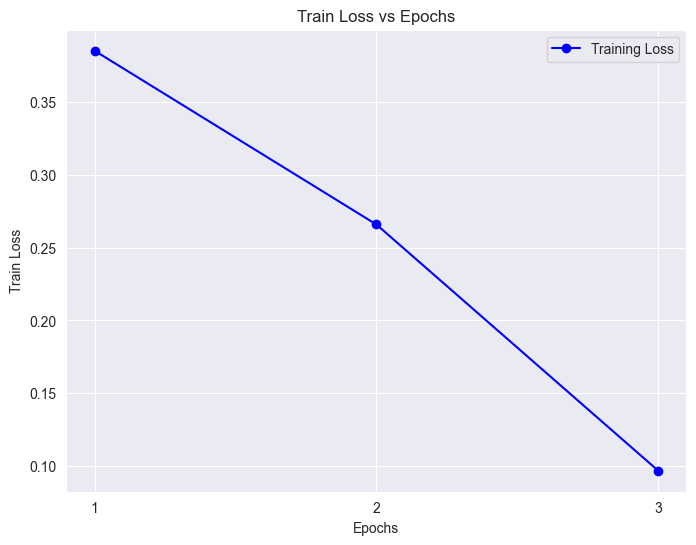

In [15]:
#train_loss': [0.43309783935546875, 0.8048801422119141, 0.042788028717041016]
# Define the epochs and corresponding eval_loss values
epochs = [1, 2, 3]
train_loss = [0.38518333435058594,
               0.26589345932006836,
               0.09686851501464844]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Add titles and labels
plt.title('Train Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.xticks(epochs)  # Ensure the x-axis has ticks for each epoch

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#evaluate the model based on the test data
result, model_output, incorrect_predictions = model_roberta.eval_model(test_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [17]:
# predict emotions
predictions = model_roberta.predict(test_data['modified_comment'].tolist())

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [18]:
y_test_anger = test_data['Anger'].to_numpy()
y_test_surprise = test_data['Surprise'].to_numpy()

In [19]:
print(classification_report(y_test_anger, predictions[0]))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       332
           1       0.46      0.47      0.47        68

    accuracy                           0.82       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.82      0.82      0.82       400



In [20]:
print(classification_report(y_test_surprise, predictions[0]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       335
           1       0.14      0.15      0.15        65

    accuracy                           0.71       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.72      0.71      0.72       400



# Dataset (2) Go Emotions

In [21]:
"""https://github.com/google-research/google-research/tree/master/goemotions"""

go_emotions = pd.read_csv('https://raw.githubusercontent.com/google-research/google-research/refs/heads/master/goemotions/data/train.tsv', sep='\t')
go_emotions.columns =  ["text","targets","id"]

#go_emotions["targets"] = go_emotions["targets"].to_numpy()
#go_emotions["text"] = go_emotions["text"].astype(str).tolist()

go_emotions["targets"].value_counts()
#Size of dataset = 43,410 rows

targets
27           12822
0             2710
4             1873
15            1857
1             1652
             ...  
6,15,22          1
9,10,19          1
7,10,25          1
7,9,24,25        1
0,1,18           1
Name: count, Length: 711, dtype: int64

In [ ]:
#Testing features
string_rows = go_emotions["text"].astype(str).tolist()
string_rows

In [ ]:
#Testing labels
target_rows = go_emotions["targets"].astype(str).tolist()
target_rows

In [86]:
import re
t = []
for row in target_rows:
    t.extend(re.findall(r'\b2\b', row))

In [24]:
go_emotions["text"] = string_rows
go_emotions["text"]

0        Now if he does off himself, everyone will thin...
1                           WHY THE FUCK IS BAYLESS ISOING
2                              To make her feel threatened
3                                   Dirty Southern Wankers
4        OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...
                               ...                        
43404    Added you mate well I’ve just got the bow and ...
43405    Always thought that was funny but is it a refe...
43406    What are you talking about? Anything bad that ...
43407              More like a baptism, with sexy results!
43408                                      Enjoy the ride!
Name: text, Length: 43409, dtype: object

In [25]:
#Library for cleaning our text

#Removing any user handles
import neattext.functions as nfx
go_emotions["Clean_txt"] = go_emotions["text"].apply(nfx.remove_userhandles)

In [26]:
#Removing any stopwords
go_emotions["Clean_txt"] = go_emotions["Clean_txt"].apply(nfx.remove_stopwords)

In [27]:
go_emotions["Clean_txt"]

0        himself, think hes laugh screwing people inste...
1                                      FUCK BAYLESS ISOING
2                                          feel threatened
3                                   Dirty Southern Wankers
4        OmG pEyToN gOoD hElP PlAyOfFs! Dumbass Broncos...
                               ...                        
43404    Added mate I’ve got bow love hunting aspect ga...
43405                    thought funny reference anything?
43406    talking about? bad happened [NAME] fault - goo...
43407                          like baptism, sexy results!
43408                                          Enjoy ride!
Name: Clean_txt, Length: 43409, dtype: object

In [28]:
# 2, 14, 17, 18, 25, 26
# Those emotions covered in first dataset
#  Anger(2), Surprise(26) == (Nash)
#   Joy(17), Sadness(25)  == (Isaiah)
#  Love(18), Fear(14)     == (Catalina)

#This is more of a reference as you go along
emotion_targets = {
                  0  : "admiration",
                  1  : "amusement",
                  2  : "anger",
                  3  : "annoyance",
                  4  : "approval",
                  5  : "caring",
                  6  : "confusion",
                  7  : "curiosity",
                  8  : "desire",
                  9  : "disappointment",
                  10 : "disapproval",
                  11 : "disgust",
                  12 : "embarrassment",
                  13 : "excitement",
                  14 : "fear",
                  15 : "gratitude",
                  16 : "grief",
                  17 : "joy",
                  18 : "love",
                  19 : "nervousness",
                  20 : "optimism",
                  21 : "pride",
                  22 : "realization",
                  23 : "relief",
                  24 : "remorse",
                  25 : "sadness",
                  26 : "surprise",
                  27 : "neutral"
}

In [29]:
# Specifically pulling anger and surprise, avoiding similar string-like classes
import re

go_emotions["anger"] = [1 if re.search(r'\b2\b', str(row)) else 0 for row in go_emotions["targets"]]

go_emotions["surprise"] = [1 if re.search(r'\b26\b', str(row)) else 0 for row in go_emotions["targets"]]

In [30]:
test = pd.concat([go_emotions["Clean_txt"], go_emotions["anger"], go_emotions["surprise"]], axis=1)
go_emotions

,text,targets,id,Clean_txt,anger,surprise
0,"Now if he does off himself, everyone will thin...",27,ed00q6i,"himself, think hes laugh screwing people inste...",0,0
1,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,FUCK BAYLESS ISOING,1,0
2,To make her feel threatened,14,ed7ypvh,feel threatened,0,0
3,Dirty Southern Wankers,3,ed0bdzj,Dirty Southern Wankers,0,0
4,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,26,edvnz26,OmG pEyToN gOoD hElP PlAyOfFs! Dumbass Broncos...,0,1
...,...,...,...,...,...,...
43404,Added you mate well I’ve just got the bow and ...,18,edsb738,Added mate I’ve got bow love hunting aspect ga...,0,0
43405,Always thought that was funny but is it a refe...,6,ee7fdou,thought funny reference anything?,0,0
43406,What are you talking about? Anything bad that ...,3,efgbhks,talking about? bad happened [NAME] fault - goo...,0,0
43407,"More like a baptism, with sexy results!",13,ed1naf8,"like baptism, sexy results!",0,0


In [31]:
train_df_data = go_emotions[["Clean_txt", "anger", "surprise"]]
test_df_data = go_emotions[["Clean_txt", "anger", "surprise"]]
train_df_data[:10000]

,Clean_txt,anger,surprise
0,"himself, think hes laugh screwing people inste...",0,0
1,FUCK BAYLESS ISOING,1,0
2,feel threatened,0,0
3,Dirty Southern Wankers,0,0
4,OmG pEyToN gOoD hElP PlAyOfFs! Dumbass Broncos...,0,1
...,...,...,...
9995,"Meh, liga knew loved went away [NAME] fled Italy",0,0
9996,Meteor Man Edit: Hancock superhero movie terri...,0,0
9997,true.,0,0
9998,guy kept jumping bridge Eichenwald death over....,0,0


In [32]:
# use to eval during training
train_data, eval_data = (train_df_data.iloc[  :int(0.8*len(train_df_data[0:10000]))],
                         train_df_data.iloc[int(0.8*len(train_df_data[0:10000])):  ])


In [33]:
eval_data.shape

(35409, 3)

In [34]:
model_roberta.train_model(train_data, eval_df=eval_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/16 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\torch\optim\lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as tex

  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(3000,
 defaultdict(list,
             {'global_step': [1000, 2000, 2000, 3000],
              'train_loss': [0.001577138900756836,
               0.23310434818267822,
               0.23310434818267822,
               0.0013056397438049316],
              'mcc': [0.37432046086500753,
               0.389930802064812,
               0.389930802064812,
               0.387232420383696],
              'accuracy': [0.9634556186280324,
               0.9628060662543421,
               0.9628060662543421,
               0.9592758903103731],
              'f1_score': [0.6813123819368836,
               0.6917632375848333,
               0.6917632375848333,
               0.6932363843945294],
              'tp': [399, 444, 444, 496],
              'tn': [33716, 33648, 33648, 33471],
              'fp': [406, 474, 474, 651],
              'fn': [888, 843, 843, 791],
              'auroc': [0.8916617105029273,
               0.886158444581163,
               0.886158444581163,
               0.

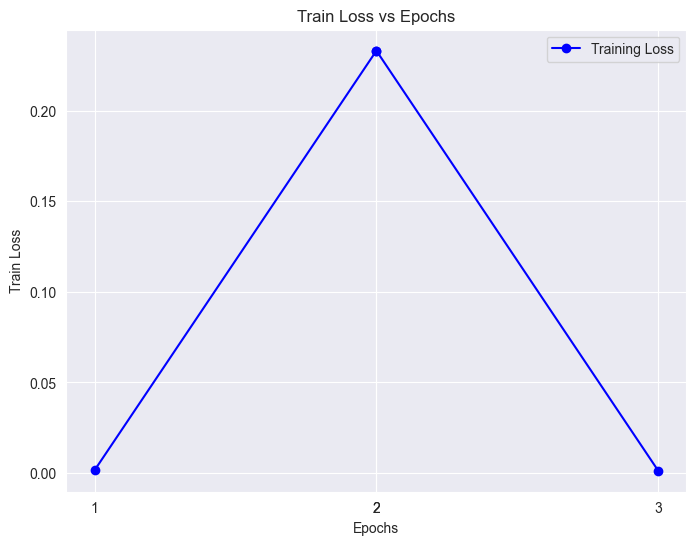

In [35]:
# Define the epochs and corresponding train_loss values from above
epochs = [1, 2, 2, 3]
train_loss = [0.001577138900756836,
              0.23310434818267822,
              0.23310434818267822,
              0.0013056397438049316]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Add titles and labels
plt.title('Train Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.xticks(epochs)  # Ensure the x-axis has ticks for each epoch

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#evaluate the model based on the test data
result, model_output, incorrect_predictions = model_roberta.eval_model(test_df_data)


C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/86 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5427 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [37]:
print(result)

{'mcc': 0.46346007824966506, 'accuracy': 0.9645465226105185, 'f1_score': 0.7312954017398431, 'tp': 713, 'tn': 41157, 'fp': 685, 'fn': 854, 'auroc': 0.9067187508531426, 'auprc': 0.4682701521976558, 'eval_loss': 0.16857722570207737}


In [38]:
pred = model_roberta.predict(test_df_data["Clean_txt"].tolist())


  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/5427 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [39]:
from sklearn.metrics import classification_report

In [60]:
y_test = test_df_data["anger"].to_numpy()

print(classification_report(y_test,
                            pred[0],
                            digits=4,
                            target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative     0.9810    0.9840    0.9825     41842
    Positive     0.5351    0.4914    0.5123      1567

    accuracy                         0.9662     43409
   macro avg     0.7581    0.7377    0.7474     43409
weighted avg     0.9649    0.9662    0.9655     43409



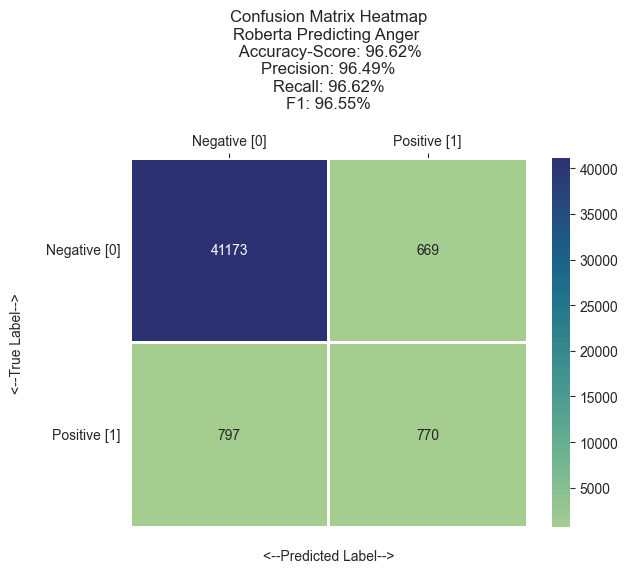

In [61]:
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix




y_prediction_cm_1 = pred[0]
cm1 = confusion_matrix(y_test, y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Negative [0]', 'Positive [1]'],
                yticklabels=['Negative [0]', 'Positive [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(y_test,
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(y_test,
                          y_prediction_cm_1,
                          average='weighted')

f1_cm1 = f1_score(y_test,
                  y_prediction_cm_1,
                  average='weighted')


plt.title(f"Confusion Matrix Heatmap\nRoberta Predicting Anger \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

## The Heatmap is flipped, but you are absolutely allowed to do so since our
## diagonal is correct with TP and TN

# 00 --> TN
# 01 --> FP
# 11 --> TP

In [58]:
y_test2 = test_df_data["surprise"].to_numpy()

print(classification_report(y_test2,
                            pred[0],
                            digits=4,
                            target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative     0.9751    0.9664    0.9707     42349
    Positive     0.0097    0.0132    0.0112      1060

    accuracy                         0.9431     43409
   macro avg     0.4924    0.4898    0.4909     43409
weighted avg     0.9515    0.9431    0.9473     43409



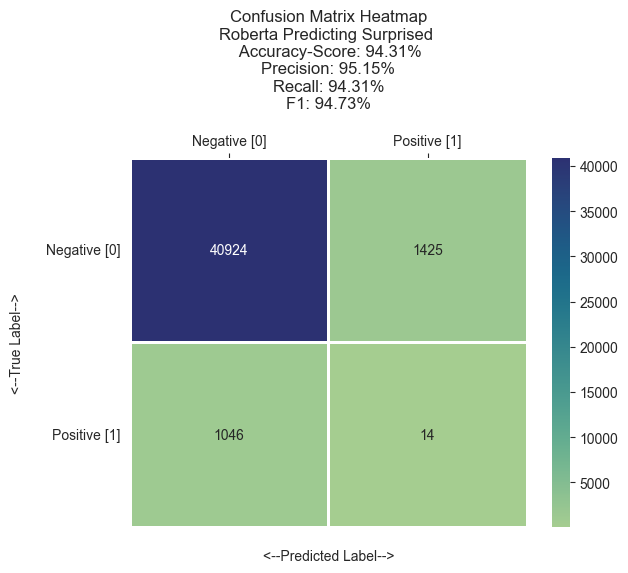

In [59]:
y_prediction_cm_1 = pred[0]
cm1 = confusion_matrix(y_test2, y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Negative [0]', 'Positive [1]'],
                yticklabels=['Negative [0]', 'Positive [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(y_test2,
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(y_test2,
                          y_prediction_cm_1,
                          average='weighted')

f1_cm1 = f1_score(y_test2,
                  y_prediction_cm_1,
                  average='weighted')


plt.title(f"Confusion Matrix Heatmap\nRoberta Predicting Surprised \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

## The Heatmap is flipped, but you are absolutely allowed to do so since our
## diagonal is correct with TP and TN

# 00 --> TN
# 01 --> FP
# 11 --> TP
# 10 --> FN

In [44]:
model_distilbert.train_model(train_data, eval_df=eval_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/16 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(3000,
 defaultdict(list,
             {'global_step': [1000, 2000, 2000, 3000],
              'train_loss': [0.001717209815979004,
               0.000852733850479126,
               0.000852733850479126,
               0.0006740391254425049],
              'mcc': [0.32649626609026283,
               0.37144901727926743,
               0.37144901727926743,
               0.4020971964876041],
              'accuracy': [0.9659691039001383,
               0.9667598633115875,
               0.9667598633115875,
               0.9596430286085459],
              'f1_score': [0.6366627844305777,
               0.6657944547662682,
               0.6657944547662682,
               0.7008585126982037],
              'tp': [247, 315, 315, 523],
              'tn': [33957, 33917, 33917, 33457],
              'fp': [165, 205, 205, 665],
              'fn': [1040, 972, 972, 764],
              'auroc': [0.8975312179110315,
               0.8763775641742937,
               0.8763775641742937,
       

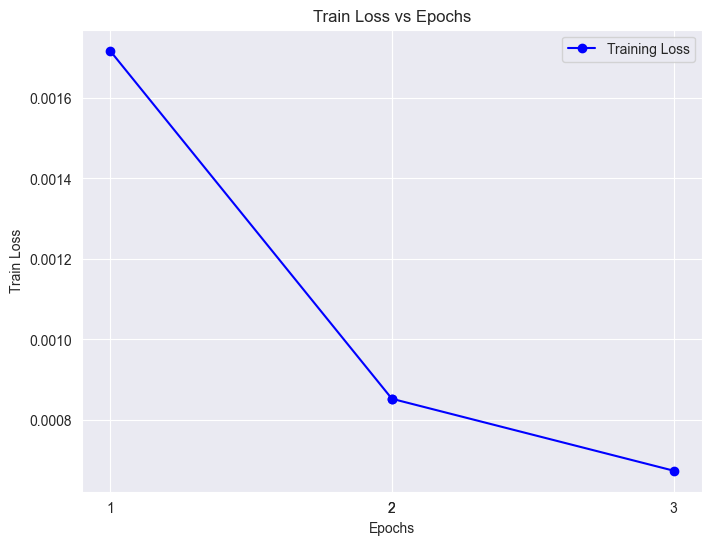

In [45]:
# Define the epochs and corresponding train_loss values from above
epochs = [1, 2, 2, 3]
train_loss = [0.001717209815979004,
              0.000852733850479126,
              0.000852733850479126,
              0.0006740391254425049]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, marker='o', linestyle='-', color='b', label='Training Loss')

# Add titles and labels
plt.title('Train Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.xticks(epochs)  # Ensure the x-axis has ticks for each epoch

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#evaluate the model based on the test data
result, model_output, incorrect_predictions = model_distilbert.eval_model(test_df_data)

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/86 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5427 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [47]:
print(result)


{'mcc': 0.4953320639713798, 'accuracy': 0.9662282015250294, 'f1_score': 0.7474085936210748, 'tp': 770, 'tn': 41173, 'fp': 669, 'fn': 797, 'auroc': 0.9102141303625358, 'auprc': 0.5025116383047372, 'eval_loss': 0.16170097528647076}


In [48]:
pred = model_distilbert.predict(test_df_data["Clean_txt"].tolist())

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/5427 [00:00<?, ?it/s]

C:\Users\NashW\PycharmProjects\NeuralNetwork\cuda\lib\site-packages\simpletransformers\classification\classification_model.py:2188: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


In [55]:
y_test3 = test_df_data["anger"].to_numpy()

print(classification_report(y_test3,
                            pred[0],
                            digits=4,
                            target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative     0.9810    0.9840    0.9825     41842
    Positive     0.5351    0.4914    0.5123      1567

    accuracy                         0.9662     43409
   macro avg     0.7581    0.7377    0.7474     43409
weighted avg     0.9649    0.9662    0.9655     43409



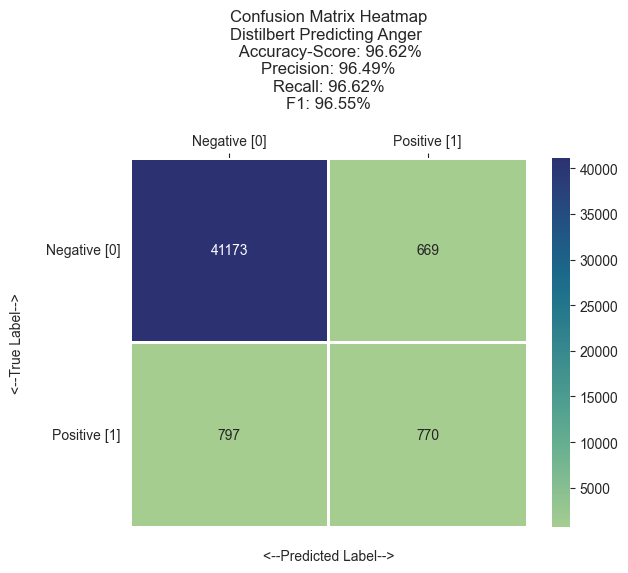

In [56]:
y_prediction_cm_1 = pred[0]
cm1 = confusion_matrix(y_test3, y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Negative [0]', 'Positive [1]'],
                yticklabels=['Negative [0]', 'Positive [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(y_test3,
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(y_test3,
                          y_prediction_cm_1,
                          average='weighted')

f1_cm1 = f1_score(y_test3,
                  y_prediction_cm_1,
                  average='weighted')


plt.title(f"Confusion Matrix Heatmap\nDistilbert Predicting Anger \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

## The Heatmap is flipped, but you are absolutely allowed to do so since our
## diagonal is correct with TP and TN

# 00 --> TN
# 01 --> FP
# 11 --> TP
# 10 --> FN

In [54]:
y_test4 = test_df_data["surprise"].to_numpy()

print(classification_report(y_test4,
                            pred[0],
                            digits=4,
                            target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative     0.9751    0.9664    0.9707     42349
    Positive     0.0097    0.0132    0.0112      1060

    accuracy                         0.9431     43409
   macro avg     0.4924    0.4898    0.4909     43409
weighted avg     0.9515    0.9431    0.9473     43409



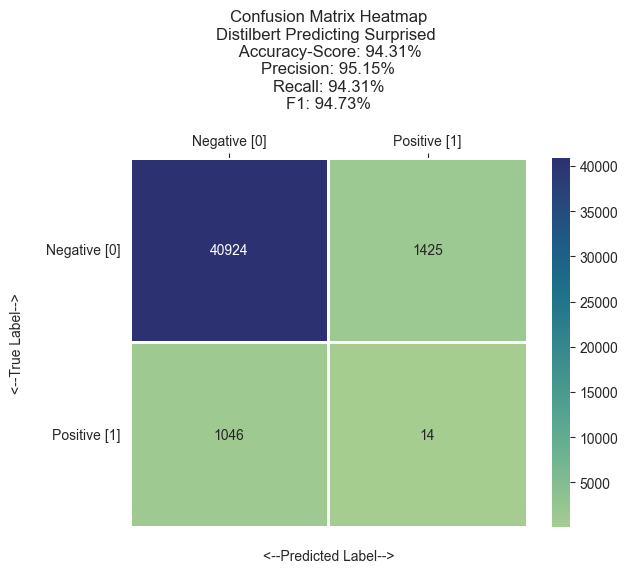

In [52]:
y_prediction_cm_1 = pred[0]
cm1 = confusion_matrix(y_test4, y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Negative [0]', 'Positive [1]'],
                yticklabels=['Negative [0]', 'Positive [1]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(y_test4,
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(y_test4,
                          y_prediction_cm_1,
                          average='weighted')

f1_cm1 = f1_score(y_test4,
                  y_prediction_cm_1,
                  average='weighted')


plt.title(f"Confusion Matrix Heatmap\nDistilbert Predicting Surprised \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

## The Heatmap is flipped, but you are absolutely allowed to do so since our
## diagonal is correct with TP and TN

# 00 --> TN
# 01 --> FP
# 11 --> TP
# 10 --> FN